In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score   
from sklearn.metrics import accuracy_score
import math
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

In [2]:
# df = pd.read_csv('raw_data.csv')
# df_train = df.drop_duplicates(ignore_index = True) # droping duplicate rows if any
# X_dat = df.to_numpy()
# # X = np.delete(X, 0, 1)
# np.random.shuffle(X_dat)
# n = len(X_dat)
# m = 0
# for i in range(n):
#     m = max(m, len(X_dat[i][1]))
# X = np.ones((n, m + 1)) * -100
# for i in range(n):
#     str = X_dat[i][1]
#     lab = X_dat[i][0]
#     for j in range(len(str)):
#         ch = ord(str[j])-64
#         X[i][j] = ch
#     X[i][-1] = lab
# print(X)
# # # np.random.shuffle(X)

In [2]:
df = pd.read_csv('fpocket_features_v3.csv')
df_train = df.drop_duplicates(ignore_index = True) # droping duplicate rows if any
X = df.to_numpy()
y = []
ones = 0
for i in range(len(X)) : 
    y.append(X[i][-1])
    if(X[i][-1] == 1) : ones += 1
X = np.delete(X, -1, 1)
print(np.shape(X))
print(ones, len(X) - ones)
# X = np.delete(X, 0, 1)


(444, 53)
324 120


In [4]:
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(random_state = 101)
# X, y = oversample.fit_resample(X, y)

In [5]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# X = encoder.fit_transform(X)


In [6]:
# df1 = pd.DataFrame(X)
# corr_matrix = df1.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [7]:
# to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
# df1 = df1.drop(df1[to_drop], axis=1)
# print(len(to_drop))
# X = df1.to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, shuffle = True)

# np.random.shuffle(X)
# X_train = X[0 : int(0.8 * len(X))]
# X_test = X[int(0.8 * len(X)) : ]
# y_train, y_test = [], []
# for i in range(len(X_train)) : y_train.append(X_train[i][-1])
# for i in range(len(X_test)) : y_test.append(X_test[i][-1])


# y_train = np.array(y_train)
# y_test = np.array(y_test)
# X_train = np.delete(X_train, -1, 1)
# X_test = np.delete(X_test, -1, 1)
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [4]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 12)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(len(y_train), y_train.count(0))

516 258


In [10]:
print(np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))

(516, 53) (516,) (89, 53) (89,)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# from sklearn.feature_selection import VarianceThreshold 
# sel = VarianceThreshold(1)
# X_train = sel.fit_transform(X_train)
# X_test = sel.transform(X_test)

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k=40)
X_train_pca = fs.fit_transform(X_train,y_train)
X_test_pca = fs.transform(X_test)

In [14]:
X_train_pca = X_train
X_test_pca = X_test

In [6]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=40, random_state = 40)
X_train_pca = svd.fit_transform(X_train)
X_test_pca = svd.transform(X_test)


In [16]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA()
# X_train_pca = lda.fit_transform(X_train_pca, y_train)
# X_test_pca = lda.transform(X_test_pca)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(516, 30)


In [18]:
# X_train_pca = X_train
# X_test_pca = X_test

In [9]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state = 11, criterion='entropy')
# randomforest = Pipeline([('pca', KernelPCA(n_components=32)), ('rf', RandomForestClassifier(criterion='entropy', random_state=0)) ])
randomforest.fit(X_train_pca,y_train)

# rand_pred1 = randomforest.predict_proba(X_test_pca)
# rand_pred = []
# for i in range(len(y_test)):
#     if(rand_pred1[i][0] >= 0.5) : rand_pred.append(-1)
#     else : rand_pred.append(1)
# score = accuracy_score(rand_pred, y_test)
# print(score)
print(randomforest.score(X_test_pca,y_test))
y_res1 = randomforest.predict(X_test_pca)

0.8202247191011236


[[13 10]
 [ 3 63]]
              precision    recall  f1-score   support

         0.0       0.81      0.57      0.67        23
         1.0       0.86      0.95      0.91        66

    accuracy                           0.85        89
   macro avg       0.84      0.76      0.79        89
weighted avg       0.85      0.85      0.84        89



C:\Users\prash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


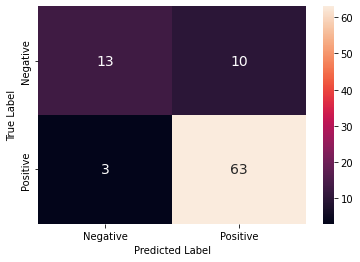

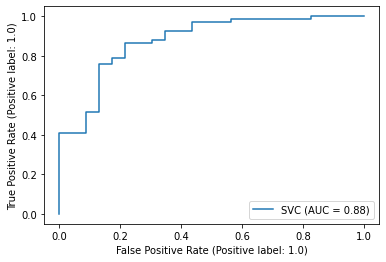

In [11]:
from sklearn.svm import SVC
from sklearn import metrics
# support vector machine
# svc_model = SVC(random_state=0, gamma= 'scale', decision_function_shape='ovo', C = 3, probability=True)
svc_model = SVC(random_state=0, gamma= 'auto', decision_function_shape='ovo', C = 1.5)
svc_model.fit(X_train_pca,y_train)
y_pred = svc_model.predict(X_test_pca)
print(confusion_matrix(y_test, y_pred))
svc_model.score(X_test_pca, y_test)
s = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 14}, fmt='g', xticklabels=['Negative','Positive'],  yticklabels=['Negative','Positive'])
        
s.set(xlabel='Predicted Label', ylabel = 'True Label')
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(svc_model, X_test_pca, y_test)
# y_res2 = svc_model.predict(X_test_pca)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
pipe1 = Pipeline([('scaler', StandardScaler()), ('svd', TruncatedSVD(n_components=40, random_state = 0)), ('svc', SVC(random_state=0, gamma= 'auto', decision_function_shape='ovo', C = 1.5)) ])
pipe1.fit(X_train, y_train)
print(pipe1.score(X_test, y_test))

0.8539325842696629


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
pipe1 = Pipeline([('scaler', StandardScaler()), ('svd', SelectKBest(score_func=mutual_info_classif, k=40)), ('svc', RandomForestClassifier(random_state = 11, criterion='entropy'))])
pipe1.fit(X_train, y_train)

print(pipe1.score(X_test, y_test))

0.8539325842696629


In [17]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

imba_pipeline = make_pipeline(
                            # SMOTE(random_state = 67),
                            StandardScaler(),
                            # RandomForestClassifier(random_state = 11, criterion='entropy'))
                            # StandardScaler(),
                            TruncatedSVD(n_components=45, random_state = 42),
                            # XGBClassifier(random_state = 0))
                            SVC(random_state=0, gamma= 'auto', decision_function_shape='ovo', C = 2))
                            # GradientBoostingClassifier(random_state=1, loss='exponential'))
kf = StratifiedKFold(n_splits=5,shuffle=True, random_state = 3)
print("f1 : ", np.mean(cross_val_score(imba_pipeline, X, y, scoring='f1_macro', cv=kf)))
print("precision : ", np.mean(cross_val_score(imba_pipeline, X, y, scoring='precision', cv=kf)))
print("accuracy : ", np.mean(cross_val_score(imba_pipeline, X, y, scoring='accuracy', cv=kf)))
print("roc_auc : ", np.mean(cross_val_score(imba_pipeline, X, y, scoring='roc_auc', cv=kf)))
imba_pipeline.fit(X, y)



import pickle
# save_file = 'ML_Model.sav'
# pickle.dump(imba_pipeline, open(save_file, 'wb'))


f1 :  0.7227904288003444
precision :  0.8243966474925377
accuracy :  0.8108018386108273
roc_auc :  0.8328084935897436


In [ ]:
# from sklearn.pipeline import Pipeline
# pipe2 = Pipeline([('scaler', StandardScaler(with_mean=False))])
# pipe2.fit_transform(X_train, y_train)


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbclassifier = GradientBoostingClassifier(random_state=0, loss='exponential')
gbclassifier.fit(X_train_pca,y_train)
gbclassifier.score(X_test_pca,y_test)

0.7865168539325843

In [25]:
from sklearn.ensemble import AdaBoostClassifier
# ada boosting our random forest 
adaboost = AdaBoostClassifier(random_state=12)
adaboost.fit(X_train_pca,y_train)

print(adaboost.score(X_test_pca, y_test))
y_res3 = adaboost.predict(X_test_pca)

0.6629213483146067


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# knn = Pipeline([('pca', KernelPCA(n_components=32)), ('knn', KNeighborsClassifier(n_neighbors=20)) ])
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.8314606741573034

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0,hidden_layer_sizes=(64, 8),batch_size=512*10, early_stopping = False, activation = 'tanh', momentum=0.9)
mlp.fit(X_train_pca, y_train)
mlp.score(X_test_pca, y_test)

C:\Users\prash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
C:\Users\prash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8089887640449438

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgclassifer = BaggingClassifier(base_estimator=svc_model, n_estimators =16
, max_samples=1.0, max_features=1.0, warm_start = True, bootstrap=True) 
bgclassifer.fit(X_train_pca, y_train)
print(bgclassifer.score(X_test_pca, y_test))

0.8426966292134831


In [ ]:
from sklearn.ensemble import BaggingClassifier
bgrclassifer = BaggingClassifier(base_estimator=randomforest, n_estimators=15
, warm_start = True, bootstrap=True) 
bgrclassifer.fit(X_train_pca, y_train)
print(bgrclassifer.score(X_test_pca, y_test))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
gnb.score(X_test_pca, y_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
onevsrest_svm = OneVsRestClassifier(svc_model)
onevsrest_svm.fit(X_train_pca, y_train)
print(onevsrest_svm.score(X_test_pca, y_test))